# Imports

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Load Data

In [33]:
x_data = np.load("data/x.npy")
y_data = np.load("data/y.npy").squeeze()

m = x_data.shape[0]
indices = np.random.permutation(m)

train_end = int(0.8 * m)
val_end = int(0.9 * m)

train_idx = indices[:train_end]
val_idx = indices[train_end:val_end]
test_idx = indices[val_end:]

x_train = x_data[train_idx]
y_train = y_data[train_idx]
x_val = x_data[val_idx]
y_val = y_data[val_idx]
x_test = x_data[test_idx]
y_test = y_data[test_idx]

# Plot Data

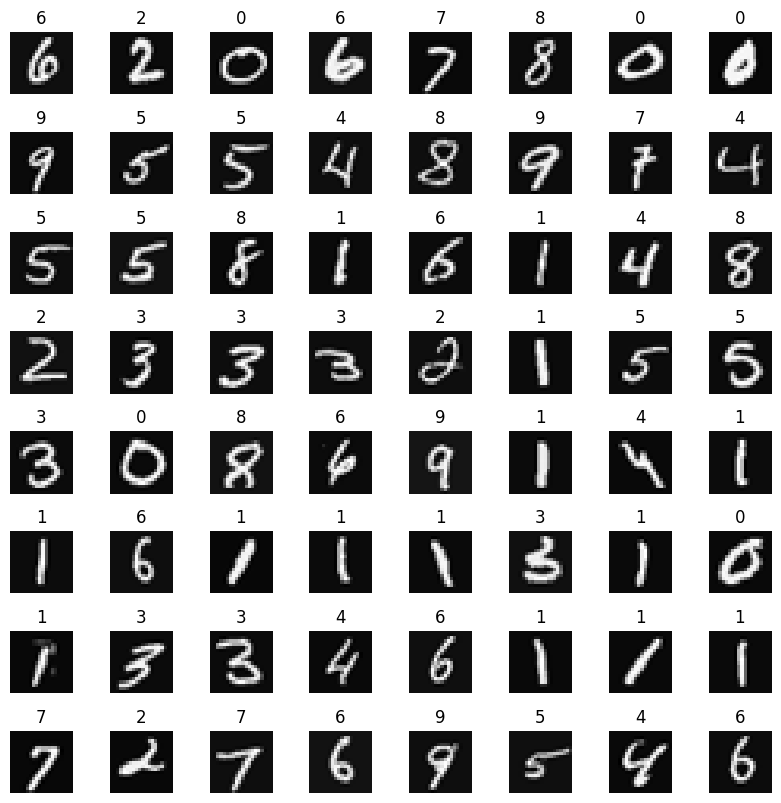

In [34]:
m, n = x_data.shape
fig, axes = plt.subplots(8, 8, figsize = (8, 8))
fig.tight_layout(pad=0.1)
for ax in axes.flat:
    random_index = np.random.randint(m)
    X_random_reshaped = x_data[random_index].reshape(20, 20).T
    ax.imshow(X_random_reshaped, cmap='gray')
    ax.set_title(y_data[random_index])
    ax.set_axis_off()

# Model

In [35]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(256, activation="relu"),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax"),
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=["accuracy"],
)

model.fit(x_train, y_train, epochs=100)

Epoch 1/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3997 - loss: 1.8212
Epoch 2/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7219 - loss: 0.9269
Epoch 3/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8113 - loss: 0.6605
Epoch 4/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8322 - loss: 0.5100
Epoch 5/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8911 - loss: 0.3482
Epoch 6/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9262 - loss: 0.2704
Epoch 7/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9385 - loss: 0.2004
Epoch 8/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9691 - loss: 0.1120
Epoch 9/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9827 - loss: 0.0664
Epoch 10/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9908 - loss: 0.0422
Epoch 11/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9924 - loss: 0.0315
Epoch 12/100
125/125 ━━━━━━━━━━━━━━━━━━━━

# Summary

In [36]:
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_40 (Dense)                │ (32, 256)              │       102,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (32, 128)              │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_42 (Dense)                │ (32, 64)               │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (32, 4)                │           260 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (32, 10)               │            50 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 432,356 (1.65 MB)

 Trainable params: 144,118 (562.96 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 288,238 (1.10 MB)

# Test

In [37]:
loss, accuracy = model.evaluate(x_test, y_test)
loss_val, accuracy_val = model.evaluate(x_val, y_val)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9487 - loss: 0.4992 
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9469 - loss: 0.5033 
